In [41]:
import pandas as pd
from sklearn.cluster import KMeans
import json

In [42]:
property ="dielectric"
# property ="elasticity"
# property ="perovskites"
file_path = f'OFM_{property}_SparseXcluster_target_clusters50.json'
n_clusters=50
df = pd.read_csv(f"OFM_{property}_property.csv")



y = df['property'].values
excluded = ["0","1", "property"]
X = df.drop(excluded, axis=1)

In [43]:
y.shape

(4764,)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate a random dataset
# np.random.seed(42)
# X = np.random.rand(100, 50)  # 100 samples with 50 features

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)

(4764, 2)


In [45]:
X_tsne = pd.DataFrame(X_tsne, columns = ["X","Y"])
X_tsne = X_tsne.reset_index(drop=True)
print(X_tsne)

              X          Y
0    -26.454432 -33.257961
1    -21.278999 -38.273891
2    -17.341425 -37.380138
3     11.703708  83.022316
4      4.027568 -29.452116
...         ...        ...
4759  37.079552 -19.661655
4760  53.877811  12.123103
4761  -9.225509   5.725760
4762  -7.319340 -21.011417
4763  -7.535542  47.375862

[4764 rows x 2 columns]


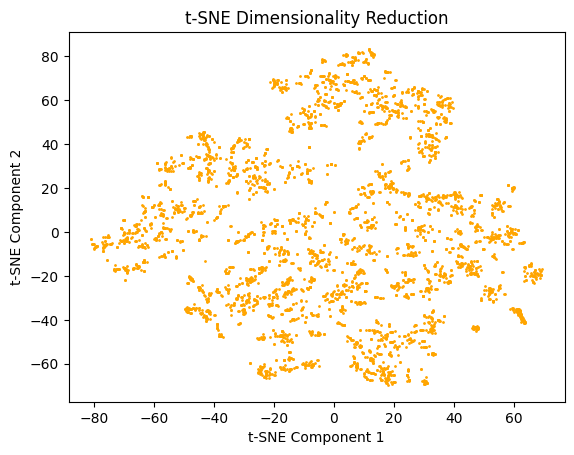

In [46]:
# Plot the reduced-dimensional data
plt.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], s=1, color="orange")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Dimensionality Reduction')
plt.show()


/var/folders/_1/z9htdvys25dbgnl4nfxmvhf80000gn/T/ipykernel_53141/529003638.py:15: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde = kde.gaussian_kde(df.T)


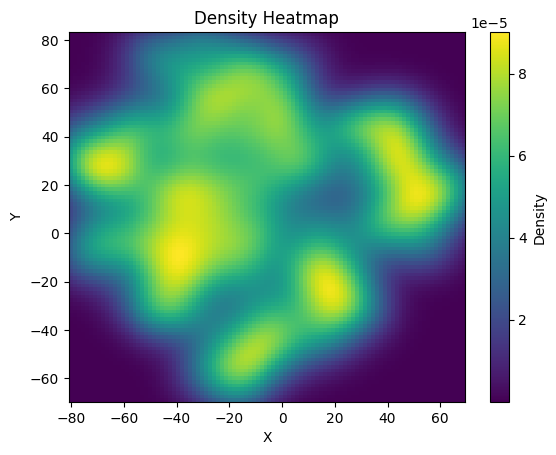

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde

# Generate some random data
# np.random.seed(42)
# x = np.random.normal(0, 1, 100)
# y = np.random.normal(0, 1, 100)

# Create DataFrame with the points
df = X_tsne

# Calculate the density using kernel density estimation
kde = kde.gaussian_kde(df.T)

# Define the grid for evaluation
x_grid, y_grid = np.mgrid[df['X'].min():df['X'].max():100j, df['Y'].min():df['Y'].max():100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Evaluate the density on the grid
density = np.reshape(kde(positions).T, x_grid.shape)

# Plot the density heatmap
plt.imshow(density, origin='lower', aspect='auto', extent=[df['X'].min(), df['X'].max(), df['Y'].min(), df['Y'].max()])
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density Heatmap')

# Show the plot
plt.show()


In [48]:
# Evaluate the density at each sample position
densities = kde(X_tsne.T)

density_dict = {}

# Print the density values for each sample position
for i in range(len(X_tsne)):
    density = densities[i]
    #print(f"Density at sample position {i+1}: {density}")
    
    density_dict[i] = density

#print(density_dict)

sorted_density = sorted(density_dict.items(), key=lambda x: x[1])
#print(sorted_density)
top500 = [x[0] for x in sorted_density[:500]]
X_sparse = X.iloc[top500]
print(X_sparse.shape)

(500, 1024)


In [49]:
id_map = {}

for i, index in enumerate(top500):
    id_map[i] = top500[i]
    
id_map

{0: 4603,
 1: 3978,
 2: 3683,
 3: 3814,
 4: 3384,
 5: 3106,
 6: 1409,
 7: 3356,
 8: 404,
 9: 1043,
 10: 2907,
 11: 136,
 12: 1006,
 13: 3937,
 14: 2158,
 15: 4753,
 16: 1949,
 17: 1689,
 18: 3370,
 19: 3107,
 20: 2653,
 21: 3124,
 22: 1331,
 23: 1379,
 24: 2925,
 25: 2506,
 26: 3785,
 27: 3361,
 28: 4723,
 29: 3768,
 30: 493,
 31: 3981,
 32: 481,
 33: 20,
 34: 4681,
 35: 2339,
 36: 2103,
 37: 2996,
 38: 3150,
 39: 749,
 40: 1709,
 41: 2882,
 42: 4006,
 43: 3983,
 44: 2100,
 45: 3392,
 46: 1004,
 47: 2380,
 48: 171,
 49: 4063,
 50: 156,
 51: 1350,
 52: 2513,
 53: 3244,
 54: 1339,
 55: 3625,
 56: 3165,
 57: 677,
 58: 1852,
 59: 3727,
 60: 4078,
 61: 4057,
 62: 364,
 63: 1291,
 64: 2075,
 65: 2102,
 66: 2990,
 67: 1734,
 68: 630,
 69: 1443,
 70: 460,
 71: 4010,
 72: 4610,
 73: 2751,
 74: 3479,
 75: 3650,
 76: 3148,
 77: 4634,
 78: 2032,
 79: 2205,
 80: 4701,
 81: 4492,
 82: 4597,
 83: 2411,
 84: 1841,
 85: 4086,
 86: 4602,
 87: 3849,
 88: 1387,
 89: 2402,
 90: 3449,
 91: 852,
 92: 709,
 9

In [50]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, max_iter=500, random_state=222)
kmeans.fit(X_sparse)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Print cluster labels and centers
#print("Cluster Labels:", labels)
#print("Cluster Centers:", centers)

# Create a dictionary to store the cluster assignments
cluster = {}
#print(labels)
for i, cluster_id in enumerate(labels):
    if cluster_id in cluster:
        #cluster[int(cluster_id)].append(i)
        continue
    else:
        cluster[int(cluster_id)] = [id_map[i]]







/Users/jason/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
print(cluster)

{20: [4603], 15: [3978], 47: [2907], 33: [136], 3: [20], 35: [3392], 29: [1004], 36: [156], 42: [364], 6: [1734], 40: [3650], 4: [4492], 32: [2402], 27: [709], 41: [3311], 17: [3662], 45: [4545], 9: [429], 2: [3815], 11: [850], 46: [4627], 21: [62], 30: [3717], 43: [3756], 13: [2705], 7: [1151], 1: [1306], 37: [1686], 10: [1372], 49: [1267], 22: [2473], 31: [2408], 48: [4259], 25: [2791], 8: [2151], 28: [3220], 12: [3241], 14: [3373], 24: [4528], 18: [2887], 26: [3728], 16: [3974], 23: [1766], 5: [4468], 19: [1633], 34: [3533], 44: [1324], 38: [1360], 0: [115], 39: [3372]}


In [52]:
selected_samples = []

# Print the size of each cluster
for key in sorted(cluster):
    #print(key, (cluster[key]))
    anchor_index = cluster[key][0]

    anchor_feature = X.iloc[anchor_index]
    #print(anchor_feature)
    distance_dict = {}
    for row_index in range(X.shape[0]):
        f = X.iloc[row_index]
        euclidean_distance = np.linalg.norm(anchor_feature - f)
        #print(euclidean_distance)
        
        if row_index == anchor_index:
            continue
        else:
            distance_dict[row_index] = euclidean_distance
    distance_dict = sorted(distance_dict.items(), key=lambda x: x[1])
    #print(distance_dict)
    n_added = 0
    for ck in distance_dict:
        if ck[0] not in selected_samples and n_added < 10:
            cluster[key].append(ck[0])
            selected_samples.append(ck[0])
            n_added += 1
    print(cluster[key])
    #break
for key in cluster:
    print(key, cluster[key])

[115, 4558, 4530, 3800, 452, 3714, 3381, 2966, 3143, 654, 3860]
[1306, 1227, 778, 2602, 4035, 4582, 1534, 2155, 1387, 4502, 1934]
[3815, 2919, 2114, 1189, 2720, 751, 900, 1849, 3676, 2086, 4425]
[20, 2339, 2996, 2103, 3150, 749, 1709, 2882, 2100, 4063, 2513]
[4492, 4086, 326, 1597, 456, 200, 2346, 650, 3051, 717, 1260]
[4468, 1677, 2248, 3160, 3501, 932, 2868, 2822, 3162, 4481, 4754]
[1734, 630, 1443, 4010, 4610, 460, 3479, 364, 1291, 3024, 2402]
[1151, 1826, 4098, 4622, 4629, 4578, 3022, 2678, 3129, 2834, 3142]
[2151, 1413, 2186, 3184, 2969, 3237, 3509, 2471, 888, 67, 1877]
[429, 4476, 4418, 4311, 467, 2303, 4469, 1044, 3206, 348, 1685]
[1372, 4681, 41, 123, 4653, 1760, 1828, 2907, 1207, 96, 805]
[850, 2559, 2904, 282, 4053, 2162, 2814, 752, 743, 1800, 1941]
[3241, 1323, 4197, 4188, 2233, 3576, 1283, 1358, 2385, 1141, 2779]
[2705, 3234, 3708, 3580, 3570, 68, 3581, 3709, 91, 69, 4559]
[3373, 4303, 497, 4526, 484, 3362, 2432, 2298, 3030, 3480, 1825]
[3978, 1409, 3356, 3370, 4753, 2925, 

In [53]:
# Example: Print formulas in cluster 0
# for index in cluster[0]:
#     print(df_data.iloc[index]["formula"])
    
# Save the dictionary to a file in JSON format
with open(file_path, 'w') as file:
    json.dump(cluster, file)